# BÁO CÁO BÀI TẬP THỰC HÀNH VÀ ĐỒ ÁN CUỐI KỲ

- Dành cho lớp CS114.O21 và CS114.O21.KHCL
- Lần cập nhật cuối cùng: 2/7/2024

## THÔNG TIN NHÓM

1. MSSV-21522684
  - Họ và Tên: Trần Thành Tín
  - Số buổi vắng: 3
  - Số bài tập quá trình: 0 note.
  - Điểm WeCode:
  + Bài thực hành 1 - làm quen python (4/8)
  + Bài tập thực hành 2 - vẫn làm quen python (5/10)
  + Ừ thì search (4/5)
  + Giờ là sort... và list (0/4)
  + CS114.O21.x - Competition 01 (1/1, 1000, late -> 800)
  + Dự đoán điểm từ dữ liệu nộp bài wecode (0/4)


## THÔNG TIN ĐỒ ÁN - THỰC HÀNH

Các SV cần mô tả đầy đủ, càng chi tiết càng tốt về các bài thực hành đã làm để có cơ sở tính điểm đồ án và thực hành.

1. Trang github của nhóm : https://github.com/MaoiHi/CS114.O21-21522684

2. Đồ án cuối kỳ: MotocycleClassification
- Tổng số lượng ảnh đóng góp: 50. Được thu thập thủ công.
![Image description](https://drive.google.com/uc?export=view&id=16xxQFjSr5-VtoSXpOBtmQ2Rcd3Z67Jqw)

- Phương pháp rút trích đặc trưng sử dụng: MobileNetV2.
- Thuật toán học được sử dụng: CNN.
- Framework, thư viện sử dụng: Keras, Tensorflow.
- Kết quả Accuracy: xxx (ví dụ điền 79.25%). Xếp hạng: 15 (theo danh sách file CS114.O21-O21.KHCL.ScoreBoard.csv)

3. Danh sách các bài thực hành đã làm - điền thời điểm (ngày, giờ) nộp bài trên Classroom:
- Thống kê dữ liệu (CS114.Tool.DatasetStat.ipynb): Jun 08
- Tạo các splits (CS114.Tool.CreateSplit.ipynb): Jun 10
- Hiển thị các ảnh (CS114.Tool.DatasetViz.ipynb): Jun 10
- Ứng dụng Clustering (CS114.Clustering.ipynb): Jun 19
- Đánh giá Model (CS114.Evaluation.ipynb): None

4. Bài tập - Dự đoán điểm IT001
- None

5. Bài tập - Nhận dạng chữ số viết tay
- Sử dụng baseline model theo hướng dẫn.
- Đóng góp 50 ảnh viết tay: mực, chì, digital. Có nộp lại lần 2 do sai format.

## MÔ TẢ HỖ TRỢ CỦA CÁC CÔNG CỤ NHƯ CHATGPT, GEMINI, POE

- Base code được tham khảo các bài liên quan trên Kaggle.
- Điều chỉnh, sửa lỗi sử dụng các chatbot như Copilot, ChatGPT. Đồng thời tham khảo Stackoverflow,...

## CODE CỦA ĐỒ ÁN MOTOCYCLECLASSIFICATION

1. Tham khảo các bước
  - https://keras.io/examples/vision/image_classification_from_scratch/

2. Các lưu ý:
  - Cần ghi rõ thông tin ngày cập nhật
  - Đoạn code của người khác nếu sử dụng lại, phải ghi tham chiếu để phân biệt đâu là code của mình, đâu là code của người khác
  - Cần phải có chú thích càng chi tiết càng tốt để code dễ đọc, dễ kiểm tra
  - Notebook nộp bài phải là notebook đã chạy và giữ lại output
  - Các hành vi gian lận sẽ bị trừng phạt rất nghiêm khắc

# Libaries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# import libaries
import pandas as pd
import numpy as np
import os
import keras
import random
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

from keras import layers
from tensorflow import data as tf_data
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import ReduceLROnPlateau


from sklearn.metrics import confusion_matrix, accuracy_score
from datetime import datetime

2024-07-03 07:37:00.527475: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 07:37:00.527627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 07:37:00.655342: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Prepare data

In [ ]:
# current split
curSplit = 1

szTrainFileName = "/content/drive/MyDrive/Public/MotocycleDataset-Splits-{}-Train.csv".format(curSplit)
szTestFileName = "/content/drive/MyDrive/Public/MotocycleDataset-Splits-{}-Test.csv".format(curSplit)

df = pd.read_csv(szTrainFileName, names=['image_dir','category_id'])
test_df  = pd.read_csv(szTestFileName, names=['image_dir','category_id'])
df.drop_duplicates()
df.count()

In [ ]:
df['category_id'].value_counts()

In [ ]:
#to string
df['image_dir'] = df['image_dir'].apply(lambda x: os.path.join('/content/drive/MyDrive/Public', x))
df['category_id'] = df['category_id'].astype(str)

## Remove non valid path

In [ ]:
import time
def is_valid_image_pillow(file_path):
    try:
        format = Image.open(file_path).format
        if format.lower() not in ('jpeg', 'png', 'jpg', 'gif', 'bmp'):
            return False
        return True
    except (IOError, OSError):
        return False

# Assuming df is your DataFrame with columns 'images_path' and 'labels'
for index, row in df.iterrows():
    start_time = time.time()  # Record the start time
    file_path = row['image_dir']
    if not is_valid_image_pillow(file_path):
        df.drop(index, inplace=True)
    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time
    print(f"{index}: {elapsed_time:.4f} seconds")


# resest index
df.reset_index(drop=True, inplace=True)

df.count()

In [ ]:
#df.to_csv('/content/drive/MyDrive/data, model/filtered_df_1.csv', index=False)

## Remove bad directory

In [ ]:
def filter_jfif_images(df, image_column='image_dir'):
    indices_to_drop = []

    for index, row in df.iterrows():
        start_time = time.time()  # Record the start time
        file_path = row[image_column]
        try:
            with open(file_path, "rb") as fobj:
                is_jfif = b"JFIF" in fobj.peek(10)
        except Exception as e:
            is_jfif = False  # In case of any file opening or reading error, consider it not a JFIF file

        if not is_jfif:
            indices_to_drop.append(index)
        end_time = time.time()  # Record the end time
        elapsed_time = end_time - start_time
        print(f"{index}: {elapsed_time:.4f} seconds")

    return df.drop(indices_to_drop)


In [ ]:
df = filter_jfif_images(df)

df.count()

In [ ]:
#df.to_csv('/content/drive/MyDrive/data, model/filtered_df_2.csv', index=False)

## Load data

In [2]:
df = pd.read_csv('/kaggle/input/motorcycle/Data,model/filtered_df_2.csv')
df['category_id'] = df['category_id'].astype(str)
df.count()

image_dir      23420
category_id    23420
dtype: int64

In [4]:
df['image_dir'] = df['image_dir'].str.replace('/content/drive/MyDrive/Public/', '/kaggle/input/motorcycle/')
df = df[~df['image_dir'].str.contains(r'\(1\)')]
df = df[df['image_dir'] != '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.52.jpg']
df.count()

image_dir      23346
category_id    23346
dtype: int64

In [5]:
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['category_id'], shuffle=True, random_state=42)

In [6]:
train_df.head(5)

image_dir category_id
10164  /kaggle/input/motorcycle/Suzuki/21522458.Suzuk...           2
2206   /kaggle/input/motorcycle/Honda/22521293-225201...           1
17514  /kaggle/input/motorcycle/Yamaha/22520896-22520...           3
18702  /kaggle/input/motorcycle/Yamaha/21522458.Yamah...           3
9771   /kaggle/input/motorcycle/Suzuki/21521815-21520...           2

# Step 1 - Dataset Visualization

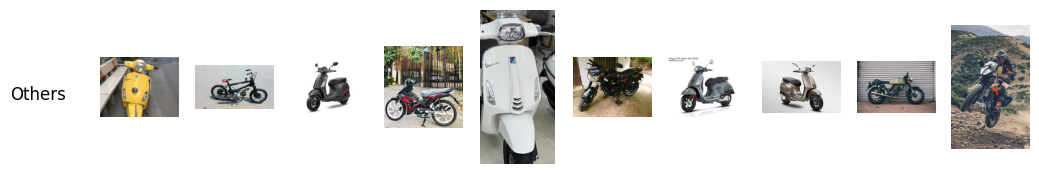

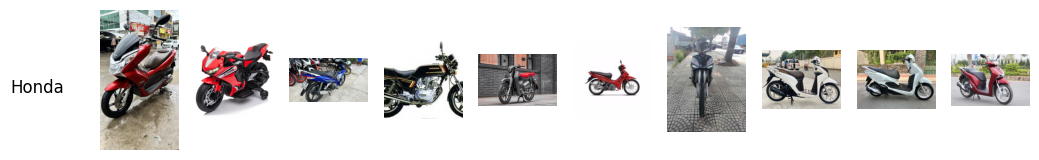

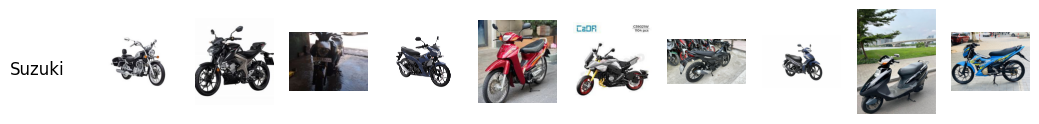

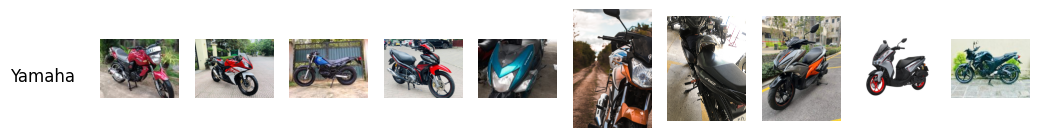

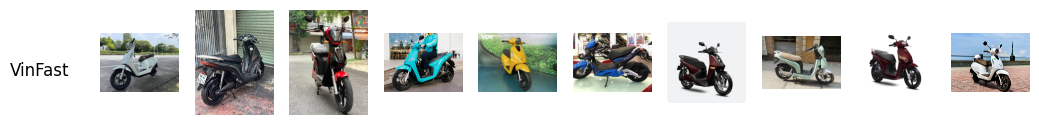

In [9]:
# Define the mapping from CategoryID to brand names
category_to_brand = {
    '0': 'Others',
    '1': 'Honda',
    '2': 'Suzuki',
    '3': 'Yamaha',
    '4': 'VinFast'
}

# Parameters for display
NumImgsPerRow = 10
ImgHeight = ImgWidth = 224

# Initialize a dictionary to store image paths by category
category_images = {brand: [] for brand in category_to_brand.values()}

# Group images by category
for _, row in train_df.iterrows():
    image_path = row['image_dir']
    category_id = row['category_id']
    brand = category_to_brand[category_id] # category_id is now a string to match the keys in category_to_brand
    category_images[brand].append(image_path)

# Display a random selection of images for each category
for brand, images in category_images.items():
    # Check if there are enough images for this category
    num_images_to_display = min(NumImgsPerRow, len(images))
    if num_images_to_display > 0:  # Only proceed if there are images to display
        selected_images = random.sample(images, num_images_to_display)
        fig, axs = plt.subplots(1, num_images_to_display, figsize=(12, 2)) # Adjust the number of subplots
        plt.suptitle(f"{brand}", x=0.05, y=0.5, ha='left')
        for i, image_path in enumerate(selected_images):
            img = Image.open(image_path)
            axs[i].imshow(img)
            axs[i].axis('off')
        plt.show()
    else:
        print(f"No images found for category: {brand}") # Inform the user if a category has no images


# Step 2 - Data Augmentation

- Keras ImageDataGenerator, with custom data gen to filter out invalid path


## Custom data generator to filter out invalid path

In [7]:
class CustomDataGenerator(Sequence):
    def __init__(self, dataframe, x_col, y_col, datagen, target_size, batch_size, class_mode):
        self.dataframe = dataframe
        self.x_col = x_col
        self.y_col = y_col
        self.datagen = datagen
        self.target_size = target_size
        self.batch_size = batch_size
        self.class_mode = class_mode
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def on_epoch_end(self):
        self.indices = np.arange(len(self.dataframe))
        np.random.shuffle(self.indices)

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_data = self.dataframe.iloc[batch_indices]

        images = []
        labels = []

        for i, row in batch_data.iterrows():
            try:
                img = Image.open(row[self.x_col])
                img = img.resize(self.target_size)
                img = np.array(img)
                if img.shape == (self.target_size[0], self.target_size[1], 3):  # Ensure the image is in RGB format
                    images.append(img)
                    labels.append(row[self.y_col])
            except Exception as e:
                print()
                print(f"Skipping corrupted image: {row[self.x_col]}")

        if len(images) == 0:
            return self.__getitem__((index + 1) % self.__len__())

        images = np.array(images)
        labels = np.array(labels)

        if self.class_mode == 'categorical':
            labels = tf.keras.utils.to_categorical(labels, num_classes=self.dataframe[self.y_col].nunique())

        return self.datagen.flow(images, labels, batch_size=self.batch_size).__next__()


## Data gen

In [8]:
# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate train augmented images
train_generator = CustomDataGenerator(
    dataframe=train_df,
    x_col='image_dir',
    y_col='category_id',
    datagen=datagen,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0) #rescale validation

# Generate test augmented images
val_generator = CustomDataGenerator(
    dataframe=val_df,
    x_col='image_dir',
    y_col='category_id',
    datagen=val_datagen,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)

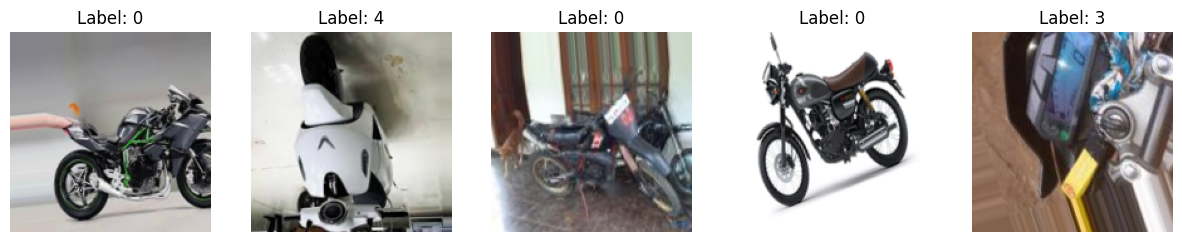

In [10]:
# Fetch a batch of images and labels
images, labels = train_generator.__getitem__(0)

# Plot some examples
def plot_images(images, labels, n=5):
    plt.figure(figsize=(15, 15))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {np.argmax(labels[i])}")
        plt.axis("off")

# Display the images
plot_images(images, labels, n=5)
plt.show()

# Step 3 - Model Configuration

- MobileNetV2 + CNN

In [21]:
base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')

# Add custom layers on top of the base model
x = base_model.output
# First custom convolutional layer with 32 filters of size 5x5, ReLU activation, and same padding
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same')(x) 
x = Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same')(x) 
# Max pooling layer to reduce the spatial dimensions by half
x = MaxPooling2D(pool_size=(2, 2))(x)
# Dropout layer to prevent overfitting with a dropout rate of 0.15
x = Dropout(rate=0.15)(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x) 
x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x) 
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.20)(x)
# Flatten layer to convert the 2D matrix ino a 1D vector
x = Flatten()(x)                           
# Fully connected (dense) layer with 512 units and ReLU activation
x = Dense(512, activation='relu')(x)
x = Dropout(rate=0.25)(x)
predictions = Dense(5, activation='softmax')(x)  

# Combine the base model with the new top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 3,836,453 (14.63 MB)

 Trainable params: 1,578,469 (6.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

# Step 4 - Model Training


In [17]:
model.load('/kaggle/input/test-model/motorcycle_classifier.keras')
model.save('/kaggle/working/model.keras')

ValueError: The filename must end in `.weights.h5`. Received: filepath=/kaggle/working/checkpoint.keras

In [22]:
# Reduce learning rate if there's no progress
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   
    factor=0.2,           
    patience=3,           
    min_lr=1e-6,          
    verbose=1             
)

checkpoint_path = '/kaggle/working/model.keras'

# Weights checkpoint
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Combine the callbacks
callbacks = [early_stopping, checkpoint]

# Check if a checkpoint exists and load the model
if os.path.exists(checkpoint_path):
    print("Loading model from checkpoint.")
    model.load_weights(checkpoint_path)

Loading model from checkpoint.


In [23]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_generator,
        epochs=50,
        validation_data=val_generator,
        callbacks=callbacks,696
        batch_size=32,
    )

Epoch 1/50
582/583 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.5487 - loss: 1.1148
Epoch 1: val_accuracy improved from -inf to 0.56835, saving model to /kaggle/working/model.keras
583/583 ━━━━━━━━━━━━━━━━━━━━ 468s 772ms/step - accuracy: 0.5488 - loss: 1.1148 - val_accuracy: 0.5683 - val_loss: 1.0799
Epoch 2/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.5606 - loss: 1.1106
Epoch 2: val_accuracy improved from 0.56835 to 0.57913, saving model to /kaggle/working/model.keras
583/583 ━━━━━━━━━━━━━━━━━━━━ 453s 769ms/step - accuracy: 0.5606 - loss: 1.1106 - val_accuracy: 0.5791 - val_loss: 1.0648
Epoch 3/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.5560 - loss: 1.1164
Epoch 3: val_accuracy did not improve from 0.57913
583/583 ━━━━━━━━━━━━━━━━━━━━ 449s 762ms/step - accuracy: 0.5560 - loss: 1.1164 - val_accuracy: 0.5770 - val_loss: 1.0647
Epoch 4/50
582/583 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.5571 - loss: 1.1034
Epoch 4: val_accuracy did not improve

In [26]:
model.save('/kaggle/working/modelv2.keras')

In [3]:
history1 = pd.read_csv('/kaggle/input/motorcycle/Data,model/history.csv')
history1

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0            0  0.460255  1.272304      0.482112  1.250483
1            1  0.467925  1.263579      0.499353  1.202434
2            2  0.474254  1.252745      0.503664  1.171768
3            3  0.490292  1.231963      0.513578  1.175958
4            4  0.488522  1.223411      0.513793  1.194344
5            5  0.495441  1.219644      0.512716  1.184535
6            6  0.502360  1.211117      0.513578  1.186368
7            7  0.504827  1.201923      0.523922  1.164958
8            8  0.510245  1.199885      0.520905  1.191759
9            9  0.515608  1.186827      0.523276  1.166013
10          10  0.520596  1.182201      0.525862  1.152979
11          11  0.521616  1.179019      0.525647  1.150073
12          12  0.529178  1.166982      0.535129  1.144088
13          13  0.527784  1.163266      0.528017  1.164944
14          14  0.530466  1.164602      0.549784  1.117769
15          15  0.536419  1.157799      0.531897  1.142954
16          16  0.531592  1.163843      0.543319  1.122378
17          17  0.532075  1.153844      0.555819  1.105786
18          18  0.536473  1.145795      0.556681  1.116142
19          19  0.535561  1.145417      0.549138  1.117495
20          20  0.533469  1.160685      0.534483  1.125329
21          21  0.543607  1.137461      0.557543  1.108377
22          22  0.549453  1.131176      0.544612  1.122713
23          23  0.545484  1.138297      0.554310  1.124601
24          24  0.542909  1.142852      0.531897  1.153022
25          25  0.546878  1.134831      0.537931  1.123677
26          26  0.548487  1.129328      0.538362  1.118225
27          27  0.548327  1.128750      0.551293  1.115054

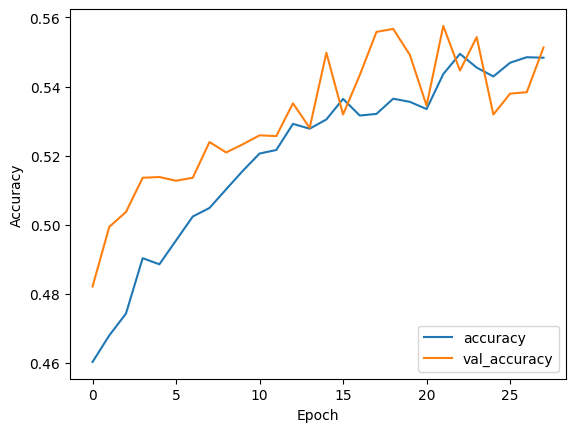

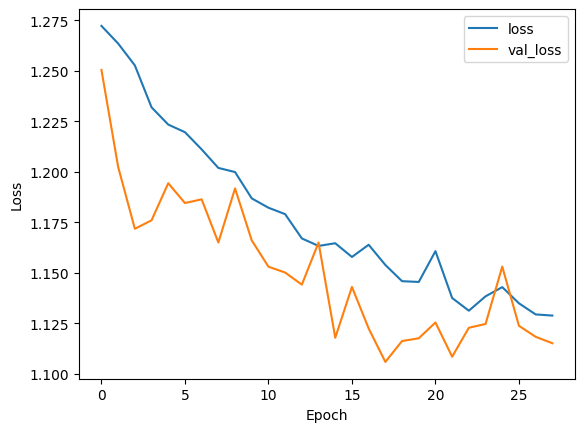

In [5]:
# Plot accuracy history
plt.plot(history1['accuracy'], label='accuracy')
plt.plot(history1['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss history
plt.plot(history1['loss'], label='loss')
plt.plot(history1['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

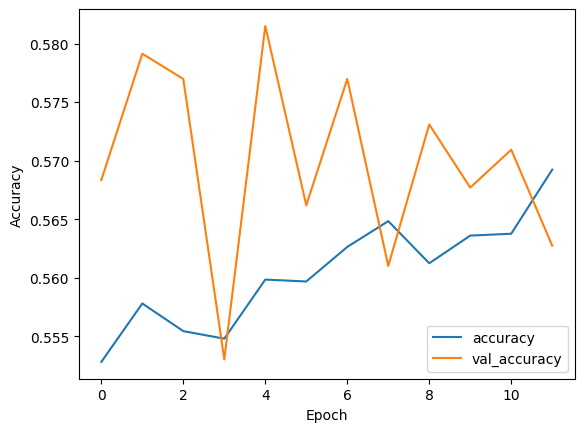

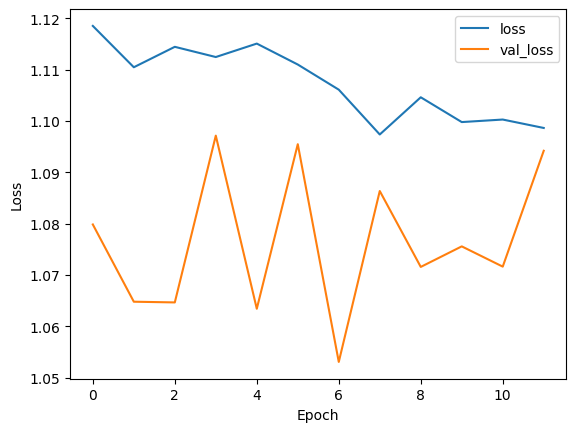

In [27]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Bước 6 - Model Evaluation

- Dùng model (kết quả của bước Model Training) để predict CategoryID của các ảnh trong tập dữ liệu Test, sau đó tính Accuracy và Confusion Matrix

In [7]:
# Load the trained model
model = load_model('/kaggle/input/motorcycle/modelv2.keras')

In [15]:
# Function to suppress TensorFlow logging
def suppress_tf_logging():
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
    tf.get_logger().setLevel('ERROR')

# Function to restore TensorFlow logging
def restore_tf_logging():
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
    tf.get_logger().setLevel('INFO')

# Function to preprocess images and make predictions, filtering out corrupted images
def preprocess_and_predict(img_path, model):
    try:
        img = image.load_img(img_path, target_size=(160, 160))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        return predicted_class[0]
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        return None

# Suppress TensorFlow logging at the start
suppress_tf_logging()

# Define the range of splits (1-5)
for num_splits in range(1, 6):
    # Load the test data
    file_path = f'/kaggle/input/motorcycle/Data,model/MotocycleDataset-Splits-{num_splits}-Test.csv'
    test_df = pd.read_csv(file_path, names=['image_dir', 'category_id'])

    # Update the image_dir column
    new_value = '/kaggle/input/motorcycle/'
    test_df['image_dir'] = new_value + test_df['image_dir']
    
    # Convert category_id to string
    test_df['category_id'] = test_df['category_id'].astype(str)

    # Apply the function to all images in the test dataset and filter out any None values
    test_df['predicted_category'] = test_df['image_dir'].apply(lambda x: preprocess_and_predict(x, model))
    test_df = test_df.dropna(subset=['predicted_category'])

    # Save the predictions to a new CSV file
    output_file_path = f'/kaggle/working/motorcycles_predictions_splits_{num_splits}.csv'
    test_df.to_csv(output_file_path, index=False)

    print(f"Predictions saved to {output_file_path}")

# Restore TensorFlow logging after all loops finish
restore_tf_logging()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1023.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1023.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1046.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1046.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1092.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1092.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1095.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1095.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1179.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1179.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1213.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1213.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1230.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1230.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1239.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1239.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1345.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1345.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1418.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1418.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1423.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1423.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1446.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1446.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.52.jpg: image file is truncated (8 bytes not processed)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.212.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.212.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.277.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.277.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.3 (1).jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.3 (1).jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.8 (1).jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.8 (1).jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.18 (1).jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.18 (1).jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.26.jpeg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-225213

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.501.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.501.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.514.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.514.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.516.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.516.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.524.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.103.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.103.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.174.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.174.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.195.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.195.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.21.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.21.png'
ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.34.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.34.png'
ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.89.jpeg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.89.jpeg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.91.jpeg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.398.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.398.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.1.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.1.png'
ERROR:root:Error loading image /kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.3.jpeg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.3.jpeg'
ERROR:root:Error loading image /kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.10.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.10.png'
ERROR:root:Error loading image /kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.17.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.255.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.255.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.463.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.463.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.117.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.117.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.174.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.174.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.199.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.199.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.200.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.200.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.341.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.341.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.350.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.350.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.361.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.361.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.582.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.582.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.159.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.159.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1024.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1024.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1030.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1030.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1093.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1093.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1096.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1096.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1157.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1157.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1176.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1176.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.2.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.2.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.253.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.253.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.268.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.268.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.549.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.549.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.643.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.643.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.4.jpeg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.4.jpeg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.16.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.16.png'
ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.20.jpeg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.20.jpeg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.23.jpeg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520968-22520996-22520999-22520929-22521373.Honda.23.jpeg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520641.Honda.480 (1).jpeg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520641.Honda.480 (1).jpeg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Honda/22520641.Honda.482 (1).jpeg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Honda/22520641.Honda.482 (1).jpeg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.520.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.520.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.521.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.521.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.527.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.527.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.180.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.180.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.199.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.199.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.209.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.209.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.211.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.211.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.236.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.236.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.1 (1).jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.1 (1).jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.19.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.19.png'
ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.24.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.24.png'
ERROR:root:Error loading image /kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.84.jpeg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Suzuki/22520968-22520996-22520999-22520929-22521

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.142.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.142.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.154.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.154.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.213.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.213.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.7.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.7.png'
ERROR:root:Error loading image /kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.9.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.9.png'
ERROR:root:Error loading image /kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.20.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.20.png'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.258.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.258.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.287.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.287.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.305.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.305.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.381.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.381.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.116.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.116.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.240.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.240.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.250.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.250.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.336.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.336.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.348.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.348.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.359.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.359.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.366.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.366.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.382.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.382.jpg'
ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.384.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.384.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.389.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.389.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.510.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.510.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.567.jpg: cannot identify image file <_io.BytesIO object at 0x7f42cc3b4ae0>
ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.571.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.571.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.287.jpg: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.287.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.23.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.23.png'
ERROR:root:Error loading image /kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.31.png: [Errno 2] No such file or directory: '/kaggle/input/motorcycle/Others/22520968-22520996-22520999-22520929-22521373.Others.31.png'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

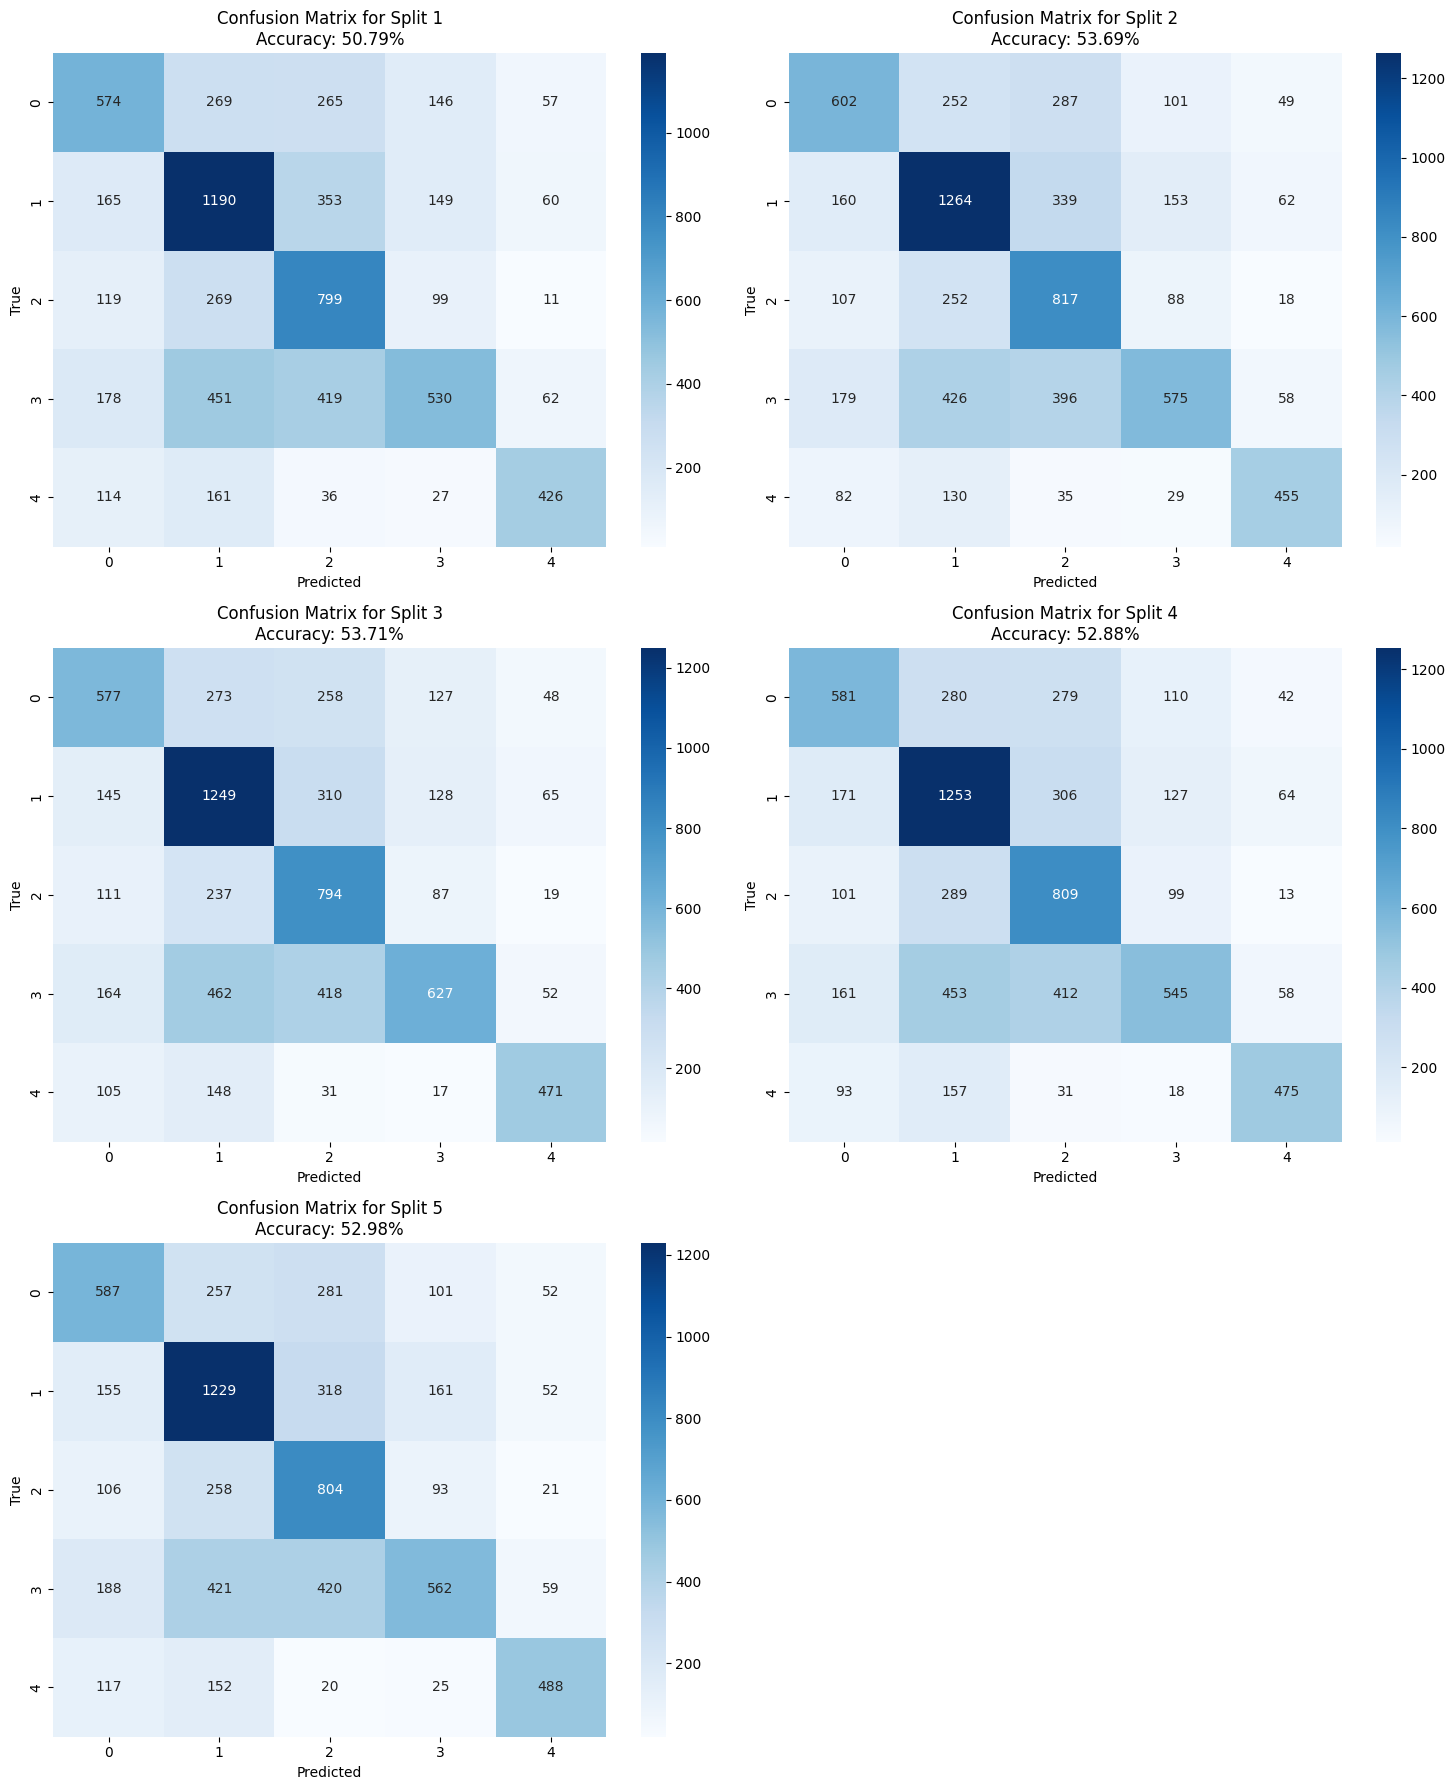

In [17]:
# Lists to store confusion matrices and accuracies
confusion_matrices = []
accuracies = []

# Loop through each split (1 to 5)
for num_splits in range(1, 6):
    # Load the CSV file with predictions
    output_file_path = f'/kaggle/working/motorcycles_predictions_splits_{num_splits}.csv'
    predictions_df = pd.read_csv(output_file_path)

    # Assuming the DataFrame has columns 'category_id' for true labels and 'predicted_category' for predictions
    true_labels = predictions_df['category_id']
    predicted_labels = predictions_df['predicted_category']

    # Calculate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    confusion_matrices.append(cm)

    # Calculate the accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    accuracies.append(accuracy)

# Plot all confusion matrices and print accuracies
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.ravel()

for i, (cm, accuracy) in enumerate(zip(confusion_matrices, accuracies)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].set_title(f'Confusion Matrix for Split {i+1}\nAccuracy: {accuracy * 100:.2f}%')

# Hide the last empty subplot if num_splits is odd
if len(axes) > len(confusion_matrices):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


Single split plot test

In [8]:
# Define the number of splits (1-5)
num_splits = 1

# Load the test data
file_path = f'/kaggle/input/motorcycle/Data,model/MotocycleDataset-Splits-{num_splits}-Test.csv'
test_df = pd.read_csv(file_path, names=['image_dir', 'category_id'], nrows = 2000)

# Update the image_dir column
new_value = '/kaggle/input/motorcycle/'
test_df['image_dir'] = new_value + test_df['image_dir']
#test_df['image_dir'] = test_df['image_dir'].str.replace('/', '\\')

# Convert category_id to string
test_df['category_id'] = test_df['category_id'].astype(str)
test_df.count()

image_dir      2000
category_id    2000
dtype: int64

In [9]:
# Function to preprocess images and make predictions, filtering out corrupted images
def preprocess_and_predict(img_path, model):
    try:
        img = image.load_img(img_path, target_size=(160, 160))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        return predicted_class[0]
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        return None

# Apply the function to all images in the test dataset and filter out any None values
test_df['predicted_category'] = test_df['image_dir'].apply(lambda x: preprocess_and_predict(x, model))
test_df = test_df.dropna(subset=['predicted_category'])

# Save the predictions to a new CSV file
output_file_path = f'/kaggle/working/motorcycles_predictions_splits_{num_splits}.csv'
test_df.to_csv(output_file_path, index=False)

print(f"Predictions saved to {output_file_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


I0000 00:00:1719992493.919054     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

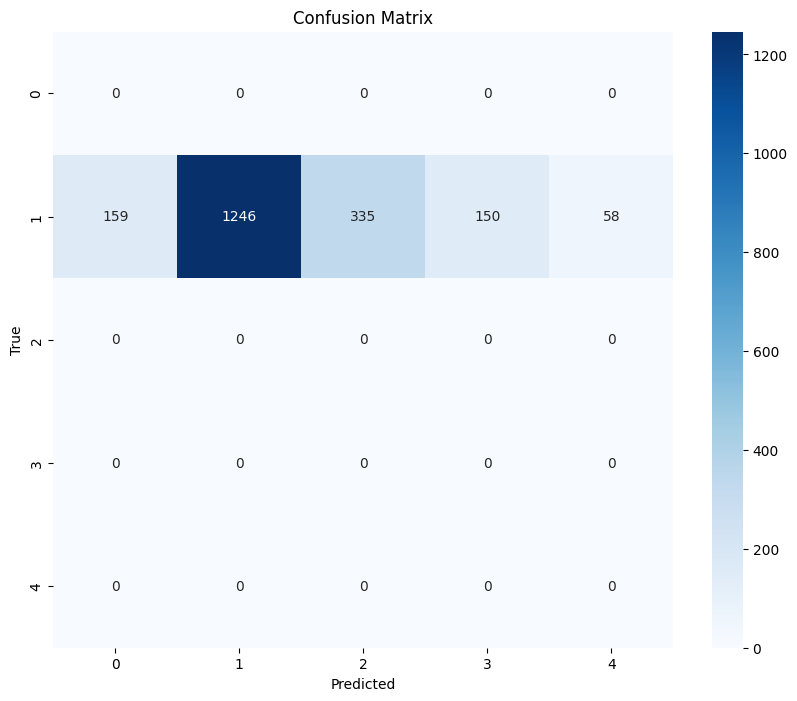

Accuracy: 63.96%


In [11]:
# Load the CSV file with predictions
output_file_path = f'/kaggle/working/motorcycles_predictions_splits_{num_splits}.csv'
predictions_df = pd.read_csv(output_file_path)

# Assuming the DataFrame has columns 'category_id' for true labels and 'predicted_category' for predictions
true_labels = predictions_df['category_id']
predicted_labels = predictions_df['predicted_category']

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 5 - Submission

- Ghi kết quả ra tập tin CS114.O21-O21.KHCL.ScoreBoard.csv theo chế độ Append: https://drive.google.com/file/d/1qjGycdcIqsoag_yaVqY8UAUNmpFUkVFe/view?usp=sharing
- Quy ước:
  - Date: ví dụ 2024-06-11 10:32:19 (dùng hàm formatted_date = now.strftime("%Y-%m-%d %H:%M:%S"))
  - GroupID: các MSSV của thành viên trong nhóm cách nhau bằng dấu gạch ngang -, ví dụ 21522446-21522243
  - SplitID: giá trị từ 1 đến 5
  - Accuracy: giá trị theo quy ước dấu . phân cách phần thập phân, ví dụ 90.2345 - lấy đến 4 số thập phân
  - Desc: mô tả phương pháp, ví dụ Random. Mỗi nhóm có thể có rất nhiều trials, do đó cần phải mô tả tóm tắt về các trial để còn nhận diện
  


In [ ]:
# Assume accuracy is already calculated and stored in a variable accuracy
accuracy_formatted = f"{accuracy:.4f}"  # Format accuracy to 4 decimal places

# Current date and time
now = datetime.now()
formatted_date = now.strftime("%Y-%m-%d %H:%M:%S")

# GroupID
group_id = "21522684"  # Replace with your group's actual student IDs

# SplitID (assuming it's from 1 to 5)
split_id = 1  # Replace with the appropriate split ID used in your evaluation

# Description of method
method_description = "Small sample test, Keras Augmentation + MobileNetV2"

# Create a DataFrame with the new submission record
new_submission = pd.DataFrame({
    'Date': [formatted_date],
    'GroupID': [group_id],
    'SplitID': [split_id],
    'Accuracy': [accuracy_formatted],
    'Desc': [method_description]
})

# Append the new submission record to the CSV file
file_path = '/content/drive/MyDrive/Public/CS114.O21-O21.KHCL.ScoreBoard.csv'  # Update with your file path
try:
    new_submission.to_csv(file_path, mode='a', header=False, index=False)
    print("Submission appended successfully.")
except Exception as e:
    print(f"Error appending submission: {e}")